In [2]:
# Cell 1 – Environment Setup
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA

In [3]:
# Cell 2 – Mount Google Drive (Colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cell 3 – Load Dataset from Google Drive
import pandas as pd

file_path = '/content/drive/My Drive/Data/star_classification.csv'
df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)
display(df.head())
df.info()
print("\nMissing values (%):")
display((df.isnull().mean() * 100).round(2))


Dataset shape: (100000, 18)


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

,0
obj_ID,0.0
alpha,0.0
delta,0.0
u,0.0
g,0.0
r,0.0
i,0.0
z,0.0
run_ID,0.0
rerun_ID,0.0


Columns in dataset:
 ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']

Using magnitude columns for histograms/color plots: ['obj_ID', 'alpha', 'delta', 'u', 'g']


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


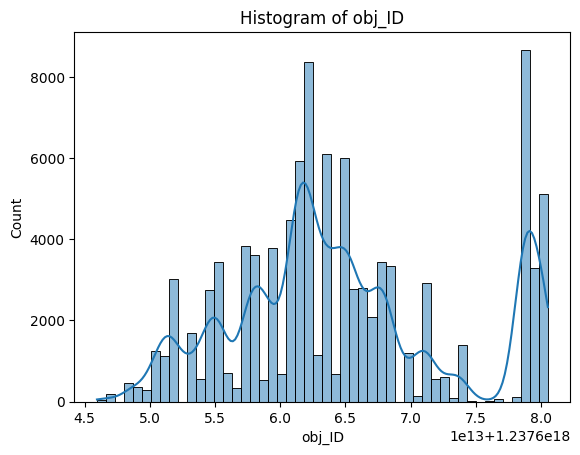

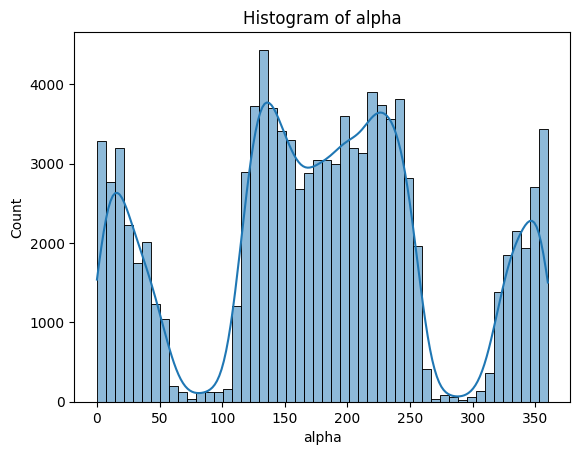

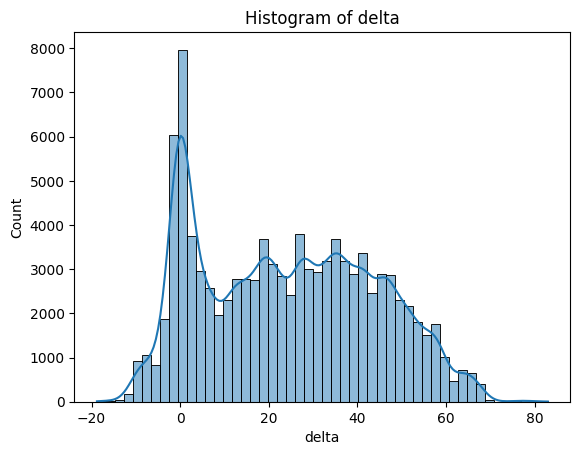

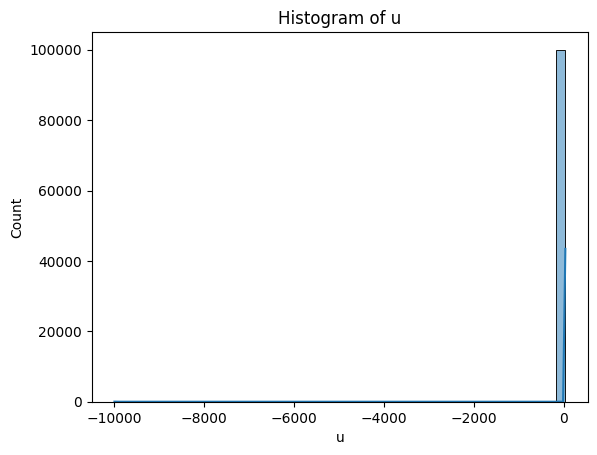

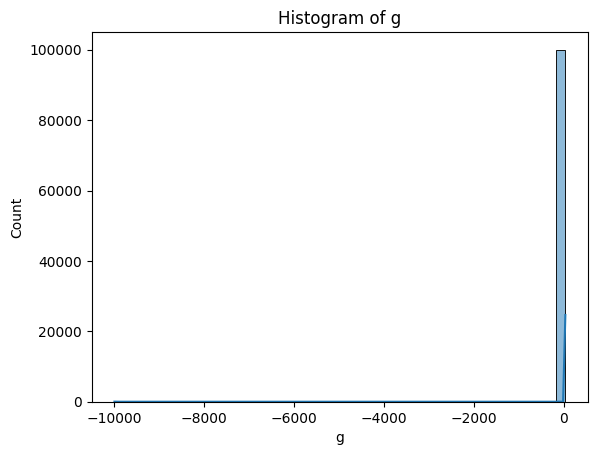

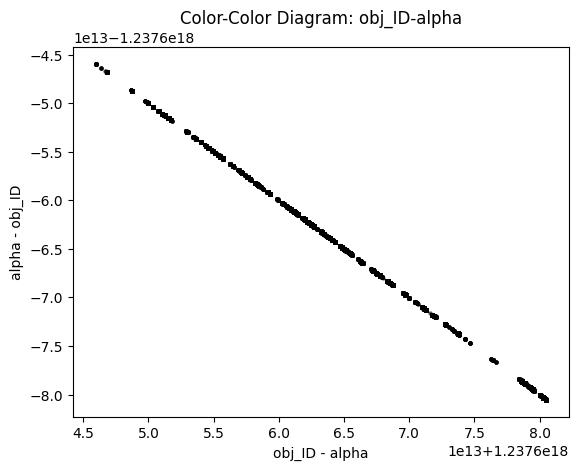

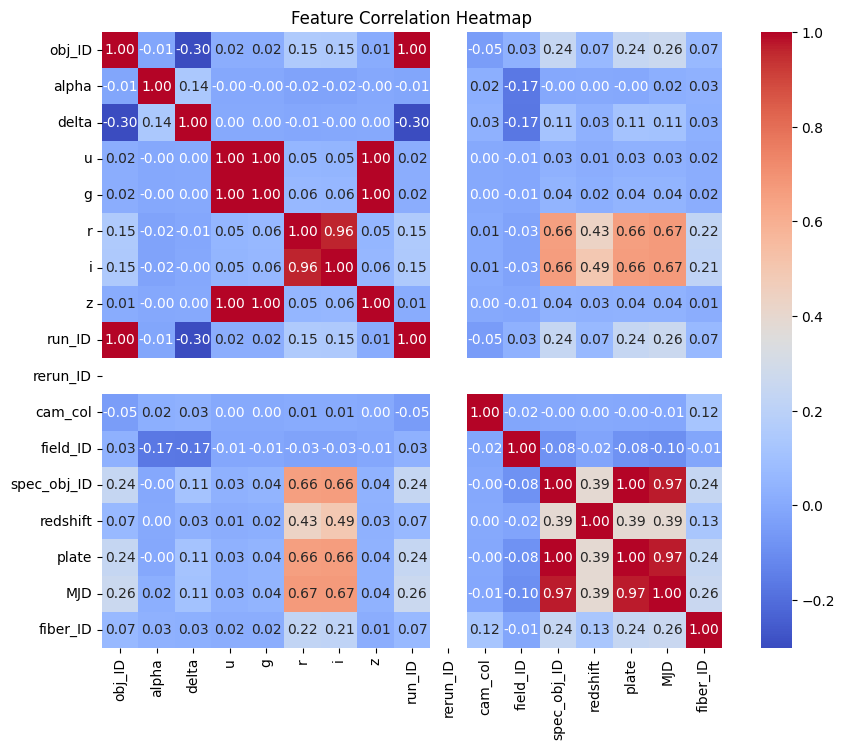

In [5]:
# Cell 4 – Exploratory Data Analysis (EDA) [Robust Version]
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 4.0 Show all column names for reference
print("Columns in dataset:\n", df.columns.tolist())

# 4.1 Identify magnitude-like columns
mags = [col for col in df.columns if 'mag' in col.lower()]
if len(mags) < 5:
    # Fallback: choose first five numeric columns excluding known non-photometry
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    exclude = {'petroRad','petroR50','petroR90','ra','dec','run_ID','cam_col','class'}
    mags = [c for c in numeric_cols if c not in exclude][:5]
print("\nUsing magnitude columns for histograms/color plots:", mags)

# 4.2 Summary statistics
display(df.describe())

# 4.3 Histograms of magnitude features
for mag in mags:
    plt.figure()
    sns.histplot(df[mag].dropna(), bins=50, kde=True)
    plt.title(f'Histogram of {mag}')
    plt.xlabel(mag)
    plt.ylabel('Count')
    plt.show()

# 4.4 Color–Color diagram (first two mags)
if len(mags) >= 2:
    x_col, y_col = mags[0], mags[1]
    plt.figure()
    plt.scatter(df[x_col] - df[y_col],
                df[y_col] - df[x_col],
                s=5, c='black', alpha=0.5)
    plt.xlabel(f'{x_col} - {y_col}')
    plt.ylabel(f'{y_col} - {x_col}')
    plt.title(f'Color-Color Diagram: {x_col}-{y_col}')
    plt.show()
else:
    print("Not enough magnitude columns for color–color plot.")

# 4.5 Correlation heatmap of all numeric features
numeric_feats = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_feats].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [6]:
# Cell 5 – Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Prepare X, y
X = df.drop(columns=['class'])
le = LabelEncoder()
y_enc = le.fit_transform(df['class'])

# 5.1 ANOVA F-test
selector_f = SelectKBest(f_classif, k=10).fit(X, y_enc)
scores_f = pd.Series(selector_f.scores_, index=X.columns).sort_values(ascending=False)

# 5.2 Mutual Information
selector_mi = SelectKBest(mutual_info_classif, k=10).fit(X, y_enc)
scores_mi = pd.Series(selector_mi.scores_, index=X.columns).sort_values(ascending=False)

print("Top 10 by ANOVA F-score:")
display(scores_f.head(10))
print("Top 10 by Mutual Information:")
display(scores_mi.head(10))

# 5.3 Select intersection
top_features = list(set(scores_f.head(12).index) & set(scores_mi.head(12).index))[:10]
print("Selected features:", top_features)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Top 10 by ANOVA F-score:


,0
redshift,83429.418967
i,8282.343545
spec_obj_ID,5169.594515
plate,5169.585517
r,4584.533364
MJD,4427.629371
fiber_ID,436.795027
delta,217.588357
run_ID,122.550340
obj_ID,122.468215


Top 10 by Mutual Information:


,0
redshift,0.801808
spec_obj_ID,0.303995
obj_ID,0.296387
plate,0.273441
MJD,0.194528
z,0.145355
run_ID,0.144668
g,0.120533
i,0.109088
u,0.100424


Selected features: ['obj_ID', 'MJD', 'run_ID', 'plate', 'redshift', 'r', 'spec_obj_ID', 'fiber_ID', 'z', 'i']


In [7]:
# Cell 6 – Preprocessing

from sklearn.preprocessing import StandardScaler

# Subset and scale
X_sel = df[top_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sel)

# Encode target
y_class = y_enc


In [8]:
# Cell 7 – Classification

from sklearn.model_selection import KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# 7.1 Setup CV and scoring
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# 7.2 Define models
models = {
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': HistGradientBoostingClassifier(random_state=42)
}

# 7.3 Cross-validate
results = []
for name, mdl in models.items():
    cv = cross_validate(mdl, X_scaled, y_class, cv=kf, scoring=scoring)
    results.append({
        'Model': name,
        'Accuracy': cv['test_accuracy'].mean(),
        'Precision': cv['test_precision'].mean(),
        'Recall': cv['test_recall'].mean(),
        'F1-score': cv['test_f1'].mean()
    })

results_df = pd.DataFrame(results).set_index('Model')
print("Classification Results (10-Fold CV):")
display(results_df)


Classification Results (10-Fold CV):


,Accuracy,Precision,Recall,F1-score
Model,,,,
k-NN,0.92817,0.933985,0.906331,0.919078
Decision Tree,0.96174,0.955523,0.956266,0.955889
Random Forest,0.97649,0.977613,0.967651,0.972401
Gradient Boosting,0.97445,0.975237,0.965667,0.970257


K-Means Silhouette:       0.310
Agglomerative Silhouette: 0.289
DBSCAN Silhouette:        -0.310 (noise excluded)


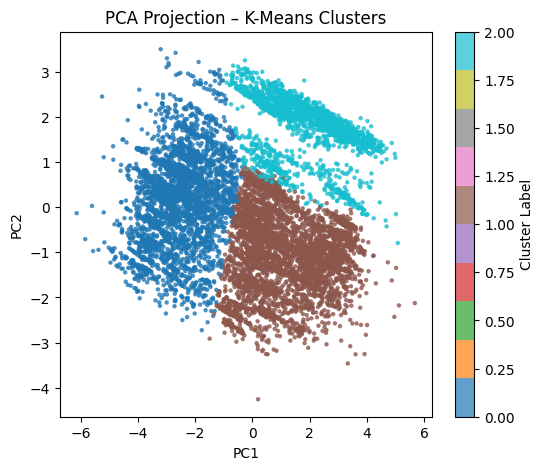

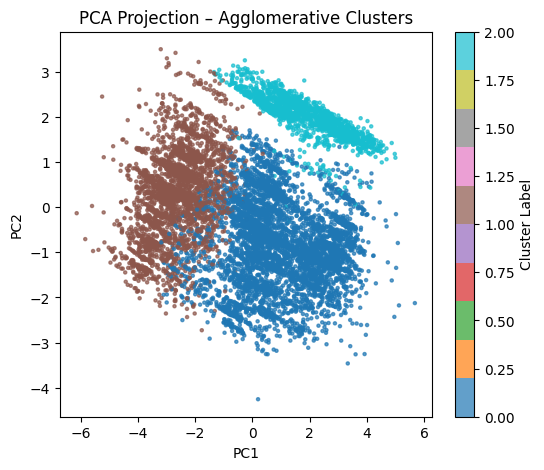

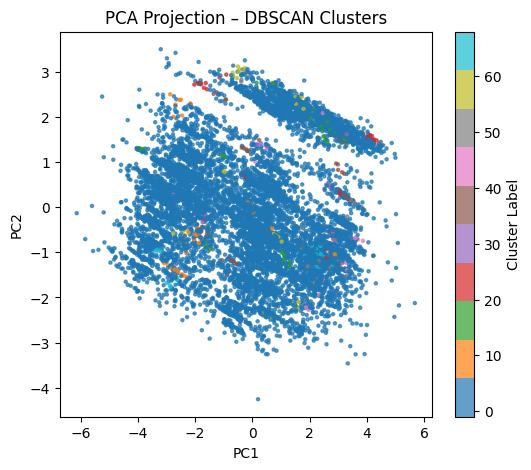

In [14]:
# Cell 8 – Clustering & Visualizations for All Methods (Original Version)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Sub-sample to 10k points for speed
n_samples = min(10000, X_scaled.shape[0])
idx = np.random.choice(X_scaled.shape[0], size=n_samples, replace=False)
X_sub = X_scaled[idx]

# Fit clusterers
labels_km  = KMeans(n_clusters=3, random_state=42).fit_predict(X_sub)
labels_agg = AgglomerativeClustering(n_clusters=3).fit_predict(X_sub)
labels_db  = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_sub)

# Compute silhouette scores (exclude DBSCAN noise)
sil_km  = silhouette_score(X_sub, labels_km)
sil_agg = silhouette_score(X_sub, labels_agg)
mask = labels_db != -1
sil_db  = silhouette_score(X_sub[mask], labels_db[mask]) if mask.any() else None

print(f"K-Means Silhouette:       {sil_km:.3f}")
print(f"Agglomerative Silhouette: {sil_agg:.3f}")
print(f"DBSCAN Silhouette:        {sil_db:.3f} (noise excluded)")

# PCA for 2D plotting
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_sub)

# Plot each clustering result separately
for name, labels in [
    ('K-Means', labels_km),
    ('Agglomerative', labels_agg),
    ('DBSCAN', labels_db)
]:
    plt.figure(figsize=(6,5))
    scatter = plt.scatter(
        X_pca[:,0], X_pca[:,1],
        c=labels, cmap='tab10', s=5, alpha=0.7
    )
    plt.title(f'PCA Projection – {name} Clusters')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()

